# <center>R5.A.11 - Méthodes d'optimisation <br> TP1b - Recuit Simulé</center>


 <center>      <i> Tom Ferragut, Thibault Godin </i> <br> <i>IUT de Vannes, BUT Informatique </i> </center>

Certaines données du TP, ainsi que certaines fonctions d'affichages, proviennent du [site de Marc Lorenzi ](https://www.mpsi-camille-guerin.fr/Python/python.html)

In [2]:
import numpy as np

import random

import networkx as nx

import math
# Affichage graphique

#%matplotlib notebook 
# enable interactivity of plots
# attention a bien fermer les fenetres plt après chaque visualisalgèbreation

%matplotlib inline


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import time

from ipywidgets import interact
import ipywidgets as widgets

plt.rcParams["figure.figsize"] = [12, 12]

rng = np.random.default_rng(12345)

## Recuit simulé

On se redonne la fonction de recuit du TP1

In [ ]:
def simulated_annealing(initial_x, max_iterations, initial_temperature, cooling_rate):
    current_x = initial_x
    current_energy = energy(current_x)
    temperature = initial_temperature

    x_values = [current_x]
    energy_values = [current_energy]

    for iteration in range(max_iterations):
        new_x = neighbour(current_x)
        new_energy = energy(new_x)

        delta_energy = new_energy - current_energy

        if delta_energy < 0 or random.random() < math.exp(-delta_energy / temperature):
            current_x = new_x
            current_energy = new_energy

        temperature *= cooling_rate

        x_values.append(current_x)
        energy_values.append(current_energy)

    return x_values, energy_values

def plot_simulated_annealing(initial_temperature, cooling_rate):
    #initial_x = random.uniform(-10, 10)
    initial_x = 10
    #fixed for comparaisons    
    max_iterations = 100
    cmap = plt.get_cmap('viridis')

    
    
    x_values, energy_values = simulated_annealing(initial_x, max_iterations, initial_temperature, cooling_rate)

    
    # Plot the function curve and the current state
    x = np.arange(-15, 15,0.01)
    y = [f(xi) for xi in x]

    plt.figure(figsize=(12, 12))
    plt.subplot(2, 1, 1)

    plt.plot(x, y, label='Function Curve')
    plt.scatter(x_values, [f(xi) for xi in x_values], c=range(len(x_values)), cmap=cmap, label='Current State', marker='o')
    plt.title('Simulated Annealing Optimization')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()

    
    

    plt.subplot(2, 1, 2)
    plt.plot(energy_values, label='x')
    plt.title('Energy')
    plt.xlabel('Iteration')
    plt.ylabel('x')

    plt.tight_layout()
    plt.show()

interact(
    plot_simulated_annealing,
    initial_temperature=widgets.FloatSlider(min=0.01, max=10.0, step=0.01, value=1.0, description='Initial Temp.'),
    cooling_rate=widgets.FloatSlider(min=0.90, max=0.9999, step=0.0001, value=0.99, description='Cooling Rate')
)

## Tri d'une liste

Dans cette partie nous allons programmer un algorithme de tri de liste en utilisant la méthode du recuit simulé. 

In [104]:
l = np.arange(20)
np.random.shuffle(l)
print(l)

#the energy function is the function itself
def energyl(l):
    n = len(l)
    e = 0

            
    return e

print(energyl(l))
  
#we pick a random point nearby the current position
def neighbourl(l):

    
    
    return l

print(l,'\n',neighbourl(l))

[19  4  6 12  3 14  0  8  7  2 18 16 11  5 15 13 10  1 17  9]
12
[19  4  6 12  3 14  0  8  7  2 18 16 11  5 15 13 10  1 17  9] 
 [19  4  6 12  3 14  0  8  7  1  2 18 16 11  5 15 13 17 17  9]


In [97]:
def simulated_annealing(initial_l, max_iterations, initial_temperature, cooling_rate):
    current_l = initial_l
    current_energy = energyl(current_l)
    temperature = initial_temperature

    
    l_values = [current_l]

    return l_values, energy_values


In [1]:
def plot_simulated_annealing(initial_temperature, cooling_rate):
    #initial_x = random.uniform(-10, 10)
    l = np.arange(20)
    np.random.shuffle(l)        
    max_iterations = 100000000
    cmap = plt.get_cmap('viridis')

    
    x_values, energy_values = simulated_annealing(l, max_iterations, initial_temperature, cooling_rate)

    


    plt.figure(figsize=(12, 12))
    plt.subplot(2, 1, 1)

    

    plt.plot(energy_values, label='x')
    plt.title('Energy')
    plt.xlabel('Iteration')
    plt.ylabel('x')

    plt.tight_layout()
    plt.show()

interact(
    plot_simulated_annealing,
    initial_temperature=widgets.FloatSlider(min=0.01, max=10.0, step=0.01, value=1.0, description='Initial Temp.'),
    cooling_rate=widgets.FloatSlider(min=0.90, max=0.9999, step=0.0001, value=0.99, description='Cooling Rate')
)

NameError: name 'interact' is not defined

Original array: [12, 4, 5, 6, 7, 3, 1, 15]
Sorted array: [15, 12, 7, 6, 5, 4, 3, 1]


## Résolution d'un Sudoku

Dans cette partie nous allons programmer un algorithme de résolution de sudoku en utilisant la méthode du recuit simulé. 

Les différents enjeux sont :
- Adapter l'implémentation vu dans le TP1a à un nouvel ensemble de configuration (les différents sudoku possibles). 
- Trouver une fonction de coût $c$ adéquat (aussi appelé énergie).



Cette partie est inspirée de l'article **Sudokus et algorithmes de recuit** écrit par _**Renaud Sirdey**_ dans le  magazine _Quadrature_ n°62


R. Sirdey, « Sudokus et algorithmes de recuit »,
Quadrature 62 (Oct.–Déc. 2006) 9–13

In [3]:
sudoku_grid = [
        [0, 0, 0, 1, 0, 9, 4, 2, 7],
        [1, 0, 9, 8, 0, 0, 0, 0, 6],
        [0, 0, 7, 0, 5, 0, 1, 0, 8],
        [0, 5, 6, 0, 0, 0, 0, 8, 2],
        [0, 0, 0, 0, 2, 0, 0, 0, 0],
        [9, 4, 0, 0, 0, 0, 6, 1, 0],
        [7, 0, 4, 0, 6, 0, 9, 0, 0],
        [6, 0, 0, 0, 0, 8, 2, 0, 5],
        [2, 9, 5, 3, 0, 1, 0, 0, 0]]

On commence par se donner une fonction `is_valid_sudoku` qui étant donné une grille `grid` sous forme de matrice renvoie `True` si la grille est complète et vérifie les différentes règles du sudoku, et renvoie `False` sinon.

In [4]:
def print_sudoku(grid):
    for row in grid:
        print(' '.join(map(str, row)))

def is_valid_sudoku(grid):
    # Check rows
    for row in grid:
        if not is_valid_unit(row):
            return False

    # Check columns
    for col in range(9):
        column = [grid[row][col] for row in range(9)]
        if not is_valid_unit(column):
            return False

    # Check 3x3 subgrids (boxes)
    for i in range(0, 9, 3):
        for j in range(0, 9, 3):
            box = [grid[x][y] for x in range(i, i + 3) for y in range(j, j + 3)]
            if not is_valid_unit(box):
                return False

    return True

def is_valid_unit(unit):
    unit = [num for num in unit if num != 0]
    return len(unit) == len(set(unit))

C'est le moment de choisir une fonction d'energie associée à votre méthode de recuit simulé.

>__Question 1__ : Définissez une fonction `energy` qui, étant donnée une grille de sudoku `state` sous forme de matrice, renvoie la valeur d'énergie (ou de coût) de cette grille. Nous voulons une énergie minimale (idéalement $0$) lorsque le sudoku est complètement résolu.

In [5]:


def is_valid_move(grid, row, col, num):
    # Check if 'num' is not already present in the current row and column
    for i in range(9):
        if grid[row][i] == num or grid[i][col] == num:
            return False

    # Check if 'num' is not already present in the 3x3 subgrid
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(3):
        for j in range(3):
            if grid[start_row + i][start_col + j] == num:
                return False

    return True

def nb_occ(grid, row, col):
    
    num=grid[row][col]
    count=0
    if num ==0 :
        return 0
    else :
        # Check if 'num' is not already present in the current row and column
        for i in range(9):
            if grid[row][i] == num and i!=col:
                count = count + 1
            if grid[i][col] == num and i!=row :
                count = count + 1
                
        # Check if 'num' is not already present in the 3x3 subgrid
        start_row, start_col = 3 * (row // 3), 3 * (col // 3)
        for i in range(3):
            for j in range(3):
                if grid[start_row + i][start_col + j] == num and start_row + i != row  and start_col + j !=col:
                    count = count + 1


    return count



def energy(state):
    
    e=0

    return e

>__Question 2__ : Implémentez la fonction `simulated_annealing` correspondant à la méthode de recuit simulé. Étant donnée la grille de départ `grid`, et les différents paramètres `max_iterations`, `initial_temperature` ainsi que `cooling_rate`, la fonction renvoie la grille résolue de sudoku si elle a été obtenu en un nombre d'itérations plus petit que `max_iterations`.

**failure :/ ** max iteration reached and energy is non-zero : energy=  6.0
Solved Sudoku:
5 6 8 1 3 9 4 2 7
1 2 9 8 7 4 5 3 6
4 3 7 6 5 2 1 9 8
9 5 6 4 1 3 7 8 2
8 7 1 9 2 6 3 5 4
9 4 2 5 8 7 6 1 1
7 8 4 2 6 5 9 1 3
6 1 3 7 4 8 2 7 5
2 9 5 3 9 1 8 4 6
Is valid Sudoku: False


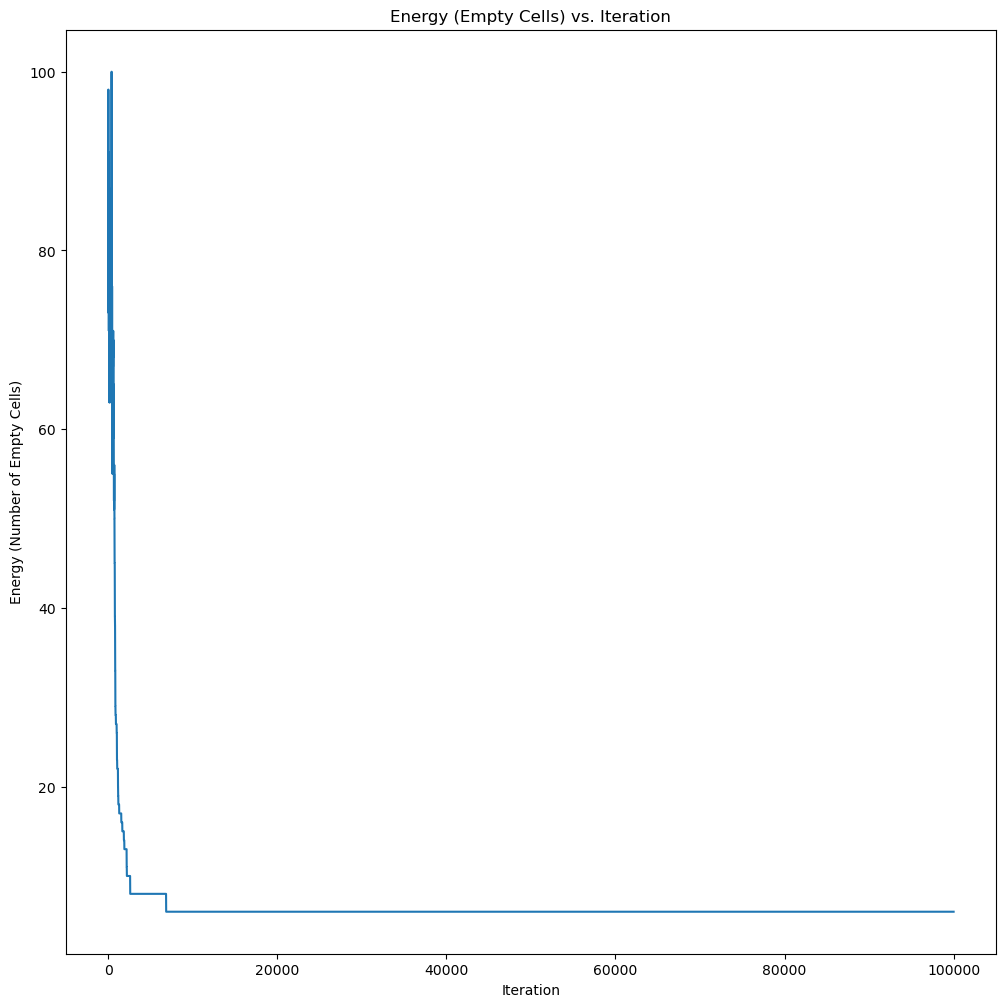

[[0 0 0 1 0 9 4 2 7]
 [1 0 9 8 0 0 0 0 6]
 [0 0 7 0 5 0 1 0 8]
 [0 5 6 0 0 0 0 8 2]
 [0 0 0 0 2 0 0 0 0]
 [9 4 0 0 0 0 6 1 0]
 [7 0 4 0 6 0 9 0 0]
 [6 0 0 0 0 8 2 0 5]
 [2 9 5 3 0 1 0 0 0]]
[[-5 -6 -8  0 -3  0  0  0  0]
 [ 0 -2  0  0 -7 -4 -5 -3  0]
 [-4 -3  0 -6  0 -2  0 -9  0]
 [-9  0  0 -4 -1 -3 -7  0  0]
 [-8 -7 -1 -9  0 -6 -3 -5 -4]
 [ 0  0 -2 -5 -8 -7  0  0 -1]
 [ 0 -8  0 -2  0 -5  0 -1 -3]
 [ 0 -1 -3 -7 -4  0  0 -7  0]
 [ 0  0  0  0 -9  0 -8 -4 -6]]
6.0


In [6]:


def simulated_annealing(grid, max_iterations, initial_temperature, cooling_rate):
    current_state,modifiable = get_initial_state(grid)
    current_energy = energy(current_state)
    temperature = initial_temperature

    energy_history = []  # To store energy at each iteration
    i=0
    

    return current_state, energy_history


"""
sudoku_grid = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]
"""
sudoku_grid = [[0, 0, 0, 1, 0, 9, 4, 2, 7],
        [1, 0, 9, 8, 0, 0, 0, 0, 6],
        [0, 0, 7, 0, 5, 0, 1, 0, 8],
        [0, 5, 6, 0, 0, 0, 0, 8, 2],
        [0, 0, 0, 0, 2, 0, 0, 0, 0],
        [9, 4, 0, 0, 0, 0, 6, 1, 0],
        [7, 0, 4, 0, 6, 0, 9, 0, 0],
        [6, 0, 0, 0, 0, 8, 2, 0, 5],
        [2, 9, 5, 3, 0, 1, 0, 0, 0]]

max_iterations = 100000
initial_temperature = 810
cooling_rate = 0.99

solved_sudoku, energy_history = simulated_annealing(sudoku_grid, max_iterations, initial_temperature, cooling_rate)

print("Solved Sudoku:")
print_sudoku(solved_sudoku)
print("Is valid Sudoku:",is_valid_sudoku(solved_sudoku))

# Plot the energy history
plt.plot(range(len(energy_history)), energy_history)
plt.xlabel('Iteration')
plt.ylabel('Energy (Number of Empty Cells)')
plt.title('Energy (Empty Cells) vs. Iteration')
plt.show()

print(np.asarray(sudoku_grid))
    
print(np.asarray(sudoku_grid)-np.asarray(solved_sudoku))

print(energy(solved_sudoku))

In [7]:
easy = [[0, 0, 0, 1, 0, 9, 4, 2, 7],
        [1, 0, 9, 8, 0, 0, 0, 0, 6],
        [0, 0, 7, 0, 5, 0, 1, 0, 8],
        [0, 5, 6, 0, 0, 0, 0, 8, 2],
        [0, 0, 0, 0, 2, 0, 0, 0, 0],
        [9, 4, 0, 0, 0, 0, 6, 1, 0],
        [7, 0, 4, 0, 6, 0, 9, 0, 0],
        [6, 0, 0, 0, 0, 8, 2, 0, 5],
        [2, 9, 5, 3, 0, 1, 0, 0, 0]]

medium = [[5, 8, 0, 0, 0, 1, 0, 0, 0],
        [0, 3, 0, 0, 6, 0, 0, 7, 0],
        [9, 0, 0, 3, 2, 0, 1, 0, 6],
        [0, 0, 0, 0, 0, 0, 0, 5, 0],
        [3, 0, 9, 0, 0, 0, 2, 0, 1],
        [0, 5, 0, 0, 0, 0, 0, 0, 0],
        [6, 0, 2, 0, 5, 7, 0, 0, 8],
        [0, 4, 0, 0, 8, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 0, 6, 5]]

evil = [[0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 6, 0, 0, 0, 0, 3],
        [0, 7, 4, 0, 8, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 3, 0, 0, 2],
        [0, 8, 0, 0, 4, 0, 0, 1, 0],
        [6, 0, 0, 5, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 7, 8, 0],
        [5, 0, 0, 0, 0, 9, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 4, 0]]

hard = [[0, 2, 0, 0, 0, 0, 0, 3, 0],
        [0, 0, 0, 6, 0, 1, 0, 0, 0],
        [0, 6, 8, 2, 0, 0, 0, 0, 5],
        [0, 0, 9, 0, 0, 8, 3, 0, 0],
        [0, 4, 6, 0, 0, 0, 7, 5, 0],
        [0, 0, 1, 3, 0, 0, 4, 0, 0],
        [9, 0, 0, 0, 0, 7, 5, 1, 0],
        [0, 0, 0, 1, 0, 4, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 9, 0]]

__Question 3__  Vérifier si la solution contient les chiffres de départ du sudoku. Corriger votre code si ce n'est pas le cas

__Question 4__  Implémenter la version (plus complexe) de l'article **Sudokus et algorithmes de recuit** écrit par _**Renaud Sirdey** (sur le moodle)

low energy!
**success !** Grid solved in  21170  iterations


Solved Sudoku:
5 6 8 1 3 9 4 2 7
1 2 9 8 4 7 3 5 6
4 3 7 2 5 6 1 9 8
3 5 6 9 1 4 7 8 2
8 7 1 6 2 3 5 4 9
9 4 2 7 8 5 6 1 3
7 8 4 5 6 2 9 3 1
6 1 3 4 9 8 2 7 5
2 9 5 3 7 1 8 6 4
Is valid Sudoku: True


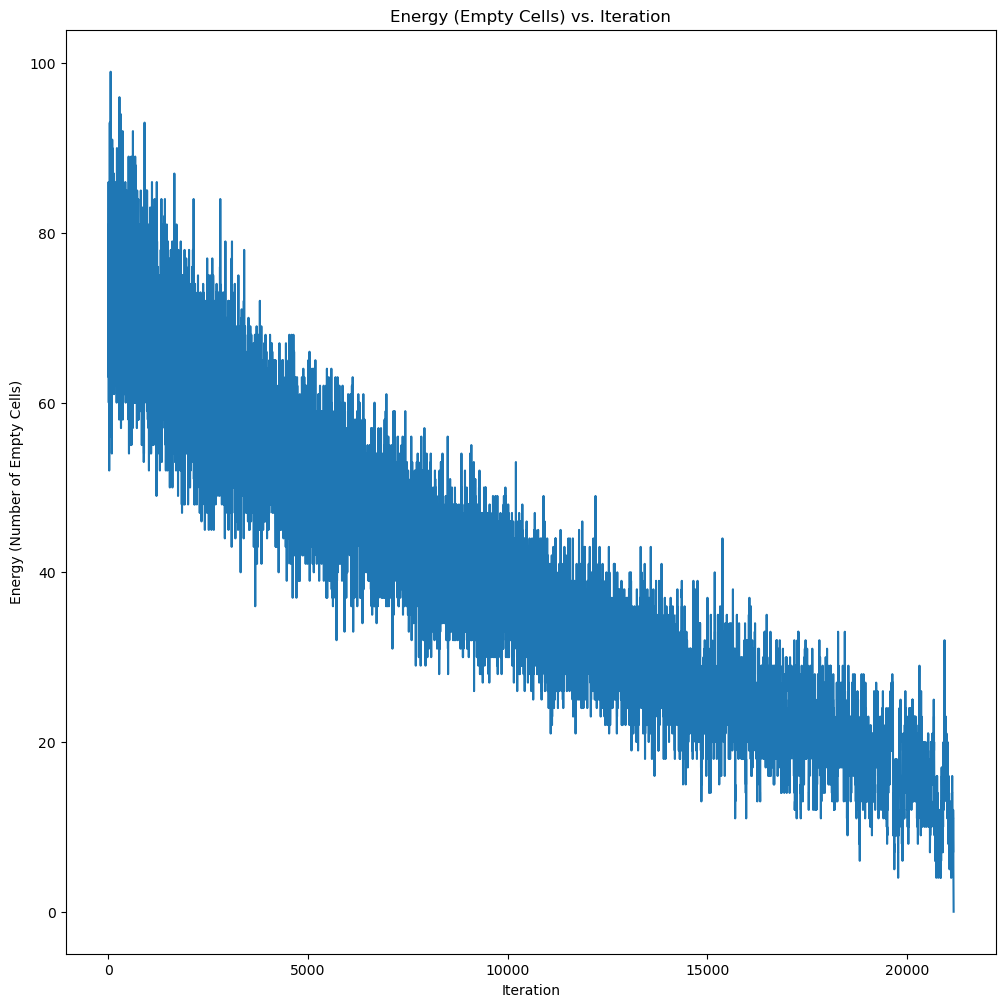

[[0 0 0 1 0 9 4 2 7]
 [1 0 9 8 0 0 0 0 6]
 [0 0 7 0 5 0 1 0 8]
 [0 5 6 0 0 0 0 8 2]
 [0 0 0 0 2 0 0 0 0]
 [9 4 0 0 0 0 6 1 0]
 [7 0 4 0 6 0 9 0 0]
 [6 0 0 0 0 8 2 0 5]
 [2 9 5 3 0 1 0 0 0]]
[[-5 -6 -8  0 -3  0  0  0  0]
 [ 0 -2  0  0 -4 -7 -3 -5  0]
 [-4 -3  0 -2  0 -6  0 -9  0]
 [-3  0  0 -9 -1 -4 -7  0  0]
 [-8 -7 -1 -6  0 -3 -5 -4 -9]
 [ 0  0 -2 -7 -8 -5  0  0 -3]
 [ 0 -8  0 -5  0 -2  0 -3 -1]
 [ 0 -1 -3 -4 -9  0  0 -7  0]
 [ 0  0  0  0 -7  0 -8 -6 -4]]
0.0


__Question 5__ (bonus) : Comparez la convergence de cette méthode pour différentes fonctions d'énergie.

## Problème du voyageur de commerce (Traveling Salesperson Problem, TSP)

Le [problème du voyageur de commerce](http://fr.wikipedia.org/wiki/Probl%C3%A8me_du_voyageur_de_commerce) est un problème d'optimisation combinatoire consistant à trouver le plus court chemin passant par toutes les villes (en terme de théorie des graphes on parlerait de [circuit hamiltonien](http://en.wikipedia.org/wiki/Hamiltonian_path) de poids minimum).

Le but de ce notebook est d'attaquer ce problème (de manière approchée) à l'aide de la méthode du recuit simulé vue au TP précédent.

Le problème de décision associé au problème d'optimisation du voyageur de commerce (c'est à dire le problème "ce tour est-il de poids minimal dans le graphe ?") est NP-complet. Il peut notamment être réduit au problème du cycle Hamiltonien, qui fait partie des 21 problèmes NP-complets de Karp.



Le module de graphe `networkx` propose des heuristiques de résolution de ce problème, vous pouvez consulter [la doc](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.approximation.traveling_salesman.traveling_salesman_problem.html).

## 1 - Tour de Bretagne (historique)

Essayons de résoudre le TSP sur le graphe décrit par `villes_bzh.dat`et `routes_bzh.dat`. 
- Les données `villes_bzh.dat` contiennent un numéro de département, le nom d'une ville de ce département ainsi que ses coordonées sur la carte `france.png`. 
- Les données `routes_bzh.dat` contiennent pour chaque département, la liste des ses départements voisins (nous considérons qu'il existe une route entre deux départements voisins).

Une première étape est de ce familiariser avec ces données ainsi qu'avec le module de graphe `networkx`. Pour cela nous commençons par afficher le graphe des différentes villes de `villes_bzh.dat`.

[22, 29, 35, 44, 56]
{22: (84, 404), 29: (32, 379), 35: (126, 380), 44: (127, 329), 56: (82, 357)}
109.62522519931258


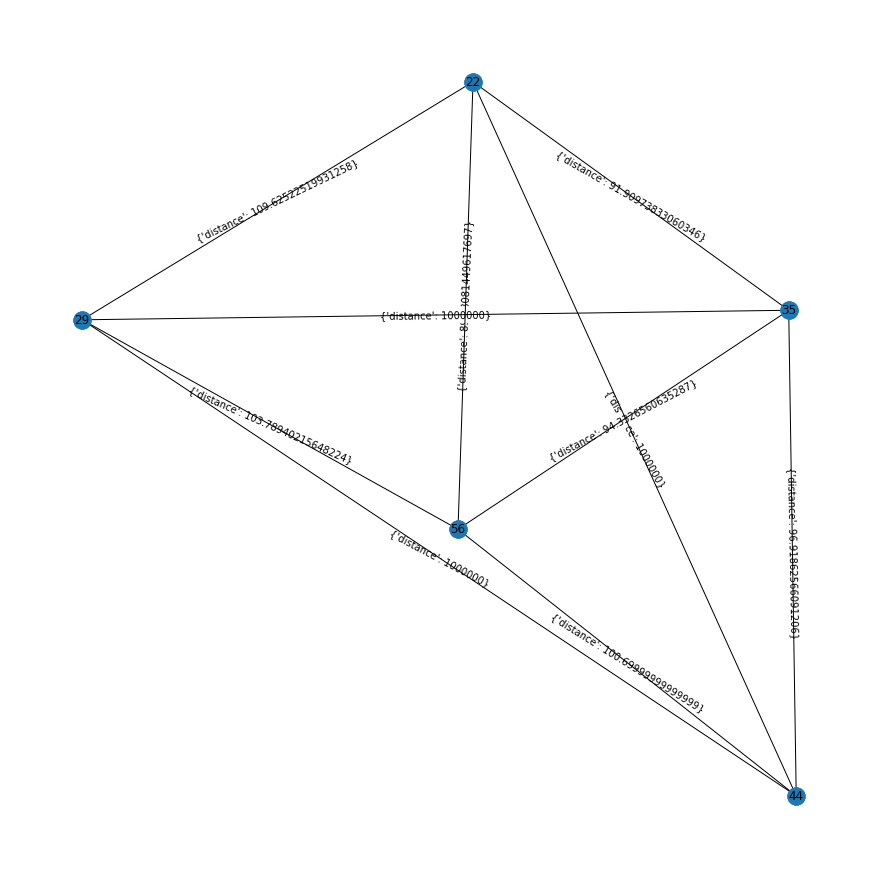

In [45]:
#lecture du fichier villes.dat


# Nombre de départements + 1
sz = 6

dept=np.array([22, 29, 35, 44, 56])


G=nx.Graph()

#Construction des sommets (nodes) du graphe G
villes = open('villes_bzh.dat')
pos={}
for i in range(1, sz):
    s = villes.readline().split(';')
    s[0]=int(s[0])
    G.add_node(s[0])

    x = int(s[2])
    y = int(s[3])
    G.nodes[s[0]]['name'] = s[1]

    G.nodes[s[0]]['position'] = (x, y)
    pos[s[0]]=(x,y)

#Affichage des sommets
nx.draw(G,pos)
print(G.nodes)


#Calcul de la distance entre deux sommets i et j    
def distance(G, i, j):
    
        (x, y) = G.nodes[i]['position']
        (a, b) = G.nodes[j]['position']
        dx = x - a
        dy = y - b
        # Conversion
        return 1.9 * math.sqrt(dx * dx + dy * dy)  
    
#Construction des arrêtes (edges) de G
routes = open('routes_bzh.dat')
for i in dept:
    s = routes.readline().split(';')
    
    #Graphe complet pour faciliter le problème 
    for j in dept:
        if i!=j and (i,j) not in G.edges:
            G.add_edges_from([(i, j, {'distance': 1000000})])
            #Cette distance choisie est arbitraire et volontairement grande.  
            #La distance est modifiée uniquement si un route correspondante existe dans route_bzh.dat.
    for j in range(1, len(s)):
        x = int(s[j])
        G.edges[i,x]['distance']=distance(G,x, i)

#Affichage des arrêtes
print(pos)
print(G.edges[29,22]['distance'])

edge_labels = nx.draw_networkx_edge_labels(G,pos = pos,)
nx.draw(G,pos = pos,with_labels=True)

>__Question 1:__ Il est commenté que nous choisissons un graphe complet pour faciliter le problème. De plus, les arrêtes ajoutées ont une longueur arbitrairement grande. Pouvez-vous trouver une explication pour ces deux choix ?

Nous affichons maintenant le graphe sur une carte de France en faisant coïncider les sommets de ce graphe G avec leur ville correspondante. 

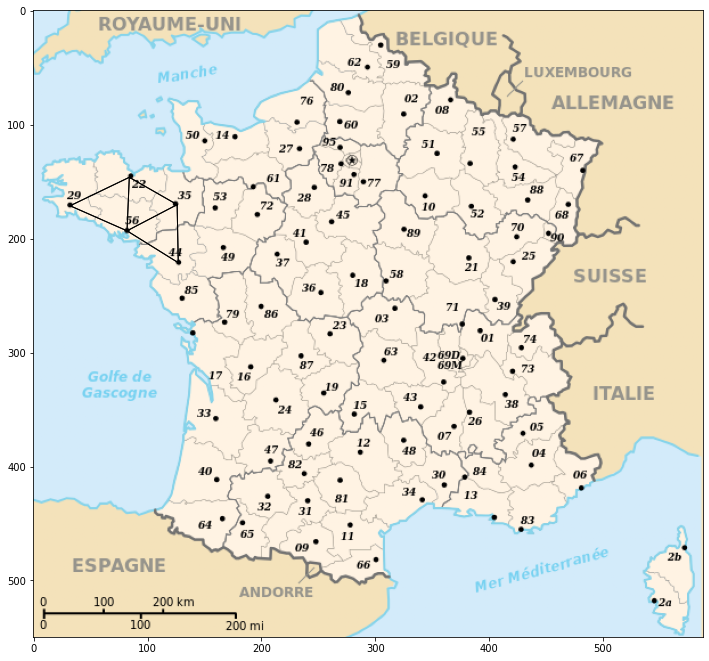

In [46]:
def afficher_carte(c=np.arange(95)+1):
    carte = mpimg.imread('france.png')
    plt.imshow(carte)
    n=len(c)
    for i in dept:
        x, y = G.nodes[i]['position']
        for j in dept:
            if i!=j:
                #La condition suivante correspond à l'existence d'une route des données route_bzh.dat (cf création des arrêtes)
                if G.edges[i,j]['distance']<1000000:
                    a, b = G.nodes[j]['position']
                    #Les arrêtes sont coloriées en bleu ou rouge lorsqu'elles font partie d'un tour du graphe
                    if c[i-1]==j or c[j-1]==i:
                        plt.plot([x, a], [550-y, 550-b], color='blue', lw=1)
                    else :
                        plt.plot([x, a], [550-y, 550-b], color='black', lw=1)
                else :
                    a, b = G.nodes[j]['position']
                    if c[i-1]==j or c[j-1]==i:
                        plt.plot([x, a], [550-y, 550-b], color='red', lw=1)
    plt.show()
    
afficher_carte()

> __Question 2:__
En utilisant la fonction `afficher_carte`, affichez la carte des routes présentes dans `routes_bzh.dat` ainsi qu'un exemple de circuit du graphe complet de sommets `villes_bzh.dat`.

### Un peu de théorie : Un mot sur la représentation des permutations

Un tour (ou circuit hamiltonien) peut-être représenté par une _[permutation](https://fr.wikipedia.org/wiki/Permutation)_. Il existe deux grandes manières de représenter cet objet : par cycle ou par tableau.

La permutation $\sigma :$ $0 \to 4 $ ; $1 \to 3 $ ; $2 \to 2 $ ; $3 \to 0 $ ; $4 \to 1 $ est représentée par le tableau 

|0 |  1 | 2 | 3 | 4 |
| --- | --- | --- | --- | --- | 
|4 |  3 | 2 | 0 | 1|


mais on peut aussi le voir comme $0 \to 4 \to 1 \to 3\to 0$ ; $2\to 2$, que l'on note avec le produit de cycle
$(0,4,1,3)(2) = (0,4,1,3)$ .


Les deux notations présentent leurs avantages, et sont souvent mélangées.

Dans ce TP, on utilisera la notation en cycle pour les tours mais celle en tableau pour les calculs.

Un propriété (importante) que l'on va utiliser est que si $\sigma$ est un tour visitant toutes les villes (on dira que $\sigma$ est une ($n$-) permutation circulaire ou un ($n$-)cycle) alors $\rho^{-1}\circ \sigma \circ \rho$ l'est aussi (on dit que $\sigma$ est _conjuguée_ par $\rho$).

On va donc pouvoir choisir aléatoirement une permutation $\rho$ et conjuguer le tour initial afin d'avancer


### Retour à la pratique

Dans la suite, l'utilisation des transpositions ce fera par la fonction `transpose`. 
>__Question 3:__
Rédigez une fonction `transpose` qui étant donnée une liste d'entiers distincts `tour` et deux de ces entiers `i` et `j`, échange la position de ces deux entiers dans la liste `tour`. Vérifiez votre fonction `transpose` avec l'exemple `tour`=[0 1 2 3 4], `i`=1 et `j`=3.

In [56]:

def transpose(tour,i,j):

    return tour


tour=np.array([0, 1, 2, 3, 4])
print("La représentation par cycle de notre permutation est",tour,",")
print("après transposition nous obtenons ",transpose(tour,1,3))

La représentation par cycle de notre permutation est [0 1 2 3 4] ,
après transposition nous obtenons  [0 3 2 1 4]


Cette fonction `transpose` nous permet de choisir, à chaque itération de la méthode de recuit simulé, une nouvelle configuration proche aléatoire. Comme dans le TP précédent, il est temps d'écrire la fonction `energy` que l'on va minimiser par recuit simulé.

> __Question 4:__ Écrire une fonction `energy` qui, étant donné un graphe `G`, un circuit de ces sommets `tour` et une liste de département `dept`, nous renvoie une energie (que l'on veux minimale pour un circuit optimal). Tester cette fonction `energy` sur au moins deux exemples.

In [57]:
def energy(G,tour,deptlist=dept):

    ener = 0

    return ener

tour=np.array([0,1,4,3,2])#good
print("L'energie du circuit",tour,"est",energy(G,tour,dept))
tour=np.array([1,4,0,2,3])
print("L'energie du circuit",tour,"est",energy(G,tour,dept))

L'energie du circuit [0 1 4 3 2] est 4000111.4702650933
L'energie du circuit [1 4 0 2 3] est 5000000


Il se trouve que la fonction `traveling_salesman_problem`, du module `networkx`, résout par méthode approché le Traveling Salesperson Problem. De plus, l'une des méthodes utilisées par cette fonction est une méthode de recuit simulé.


[16, 24, 47, 33, 17, 85, 44, 49, 79, 16, 33, 40, 33, 16, 79, 49, 53, 35, 56, 44, 85, 17, 33, 40, 64, 40, 33, 17, 85, 44, 56, 29, 56, 35, 53, 72, 49, 79, 16, 24, 16, 79, 86, 87, 23, 87, 86, 79, 85, 44, 35, 22, 35, 53, 49, 86, 87, 19, 87, 16, 17, 16]
[16, 24, 47, 33, 17, 85, 44, 49, 79, 16, 33, 40, 33, 16, 79, 49, 53, 35, 56, 44, 85, 17, 33, 40, 64, 40, 33, 17, 85, 44, 56, 29, 56, 35, 53, 72, 49, 79, 16, 24, 16, 79, 86, 87, 23, 87, 86, 79, 85, 44, 35, 22, 35, 53, 49, 86, 87, 19, 87, 16, 17]
[ 0  5 11  7  1 18 10 12 17  0  7  9  7  0 17 12 13  8 14 10 18  1  7  9
 15  9  7  1 18 10 14  6 14  8 13 16 12 17  0  5  0 17 19 20  4 20 19 17
 18 10  8  3  8 13 12 19 20  2 20  0  1]
[16, 24, 47, 33, 17, 85, 44, 49, 79, 16, 33, 40, 33, 16, 79, 49, 53, 35, 56, 44, 85, 17, 33, 40, 64, 40, 33, 17, 85, 44, 56, 29, 56, 35, 53, 72, 49, 79, 16, 24, 16, 79, 86, 87, 23, 87, 86, 79, 85, 44, 35, 22, 35, 53, 49, 86, 87, 19, 87, 16, 17] 5416.115624926442


Il nous faut maintenant implémenter la méthode de recuit simulé.

> __Question 5:__
Écrire une fonction `simulated_annealing` qui étant donné un graphe `G`, un circuit initial `initial_tour`, et des paramètres `max_iterations`, `initial_temperature` et `cooling_rate` nous renvoie un circuit d'energie optimale (au mieu) ainsi qu'une liste contenant l'évolution de l'énergie au cours des itérations.

[ 8 12 13  7 18 14 16  1 10 17  6  2  5 15 19  4 20  9  0 11  3] 11000870.804868065


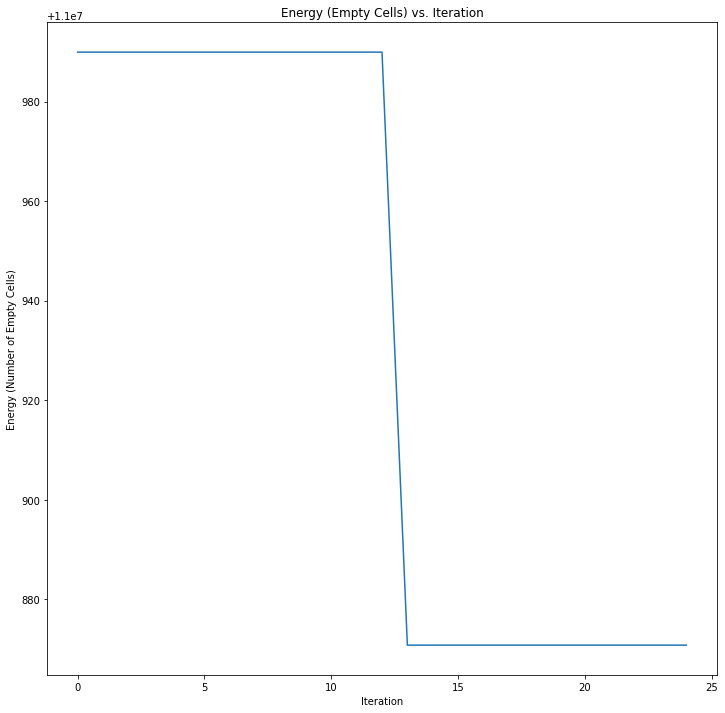

In [67]:
def simulated_annealing(G,initial_tour=[], max_iterations=10,max_inner=100, initial_temperature=100, cooling_rate=.01):
    size=G.order()
    


    
    energy_history = []  # To store energy at each iteration
   
    current_energy = energy(G,current_tour,dept)
    temperature = initial_temperature

 

    return [current_tour, energy_history]


tour, energy_history = simulated_annealing(G,max_iterations=25)
print(tour,energy_history[-1])
# Plot the energy history
plt.plot(range(len(energy_history)), energy_history)
plt.xlabel('Iteration')
plt.ylabel('Energy (Number of Empty Cells)')
plt.title('Energy (Empty Cells) vs. Iteration')
plt.show()


> __Question 6:__
Quelle solution de parcours optimal (du graphe G construit à partir des données `villes_bzh.dat` et `routes_bzh.dat`) la fonction `simulated_annealing` renvoie-t-elle ? Comparez cette solution à celle obtenue en utilisant la fonction `traveling_salesman_problem` de `networkx`.

## 2 - Tour de l'ouest (atlantique)

Dans cette partie nous répondons aux mêmes questions, mais avec comme données l'ensemble des départements de la façade atlantique. Essayons de résoudre le TSP sur le graphe décrit par `villes_ouest.dat`et `routes_ouest.dat`.

{16: (191, 237), 17: (140, 266), 19: (256, 214), 22: (84, 404), 23: (260, 265), 24: (213, 209), 29: (32, 379), 33: (160, 192), 35: (126, 380), 40: (162, 137), 44: (127, 329), 47: (208, 155), 49: (167, 342), 53: (159, 377), 56: (82, 357), 64: (167, 103), 72: (195, 371), 79: (168, 277), 85: (131, 296), 86: (199, 290), 87: (234, 246)}


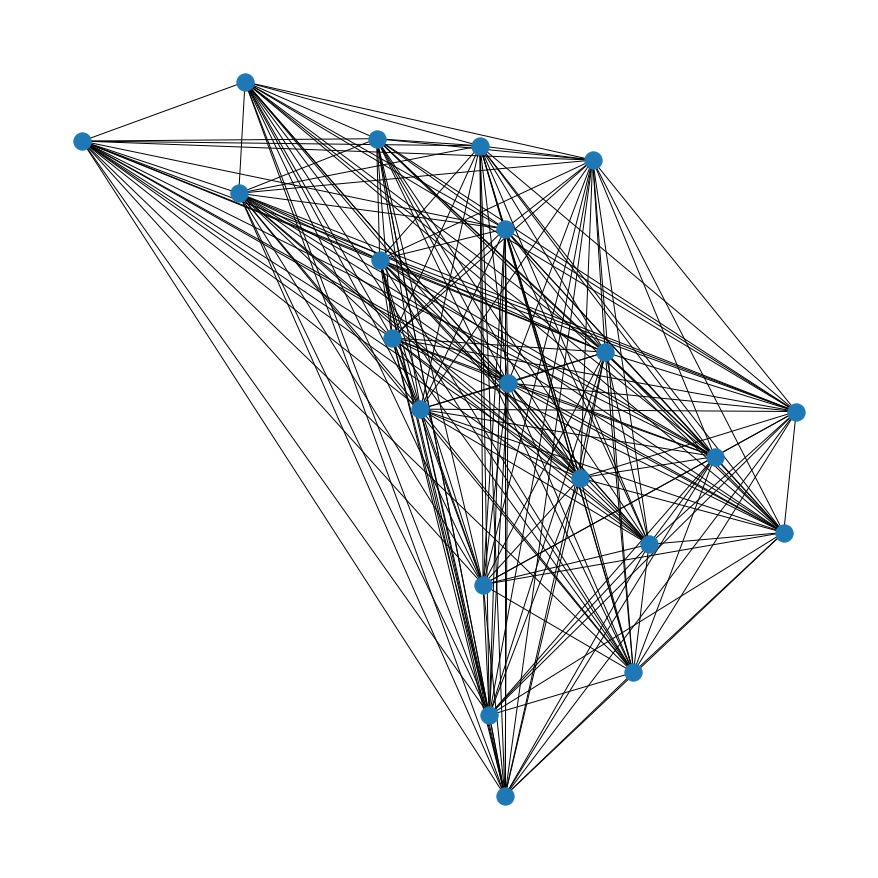

In [68]:
#lecture du fichier villes_ouest.dat

dept=np.array([16,17,19,22,23,24,29,33,35,40,44,47,49,53,56,64,72,79,85,86,87])

# Nombre de départements + 1
sz = 22

G=nx.Graph()

#nodes
villes = open('villes_ouest.dat')
pos={}
for i in range(1, sz):
    s = villes.readline().split(';')
    s[0] = int(s[0])
    G.add_node(s[0])

    x = int(s[2])
    y = int(s[3])
    G.nodes[s[0]]['name'] = s[1]

    G.nodes[s[0]]['position'] = (x, y)
    pos[s[0]]=(x,y)


def distance(G, i, j):
        (x, y) = G.nodes[i]['position']
        (a, b) = G.nodes[j]['position']
        dx = x - a
        dy = y - b
        return 1.9 * math.sqrt(dx * dx + dy * dy)
        
    
#edges
routes = open('routes_ouest.dat')
for i in dept:
    s = routes.readline().split(';')
    
    #Graphe complet pour faciliter le problème 
    for j in dept:
        if i!=j and (i,j) not in G.edges:
            G.add_edges_from([(i, j, {'distance': 1000000})])
            #Cette distance choisie est arbitraire et volontairement grande.  
            #La distance est modifiée uniquement si un route correspondante existe dans route_bzh.dat.
    for j in range(1, len(s)):
        x = int(s[j])
        G.edges[i,x]['distance']=distance(G,x, i)

print(pos)    
nx.draw(G,pos = pos)

11000870.800593734

[16, 24, 47, 33, 17, 85, 44, 49, 79, 16, 33, 40, 33, 16, 79, 49, 53, 35, 56, 44, 85, 17, 33, 40, 64, 40, 33, 17, 85, 44, 56, 29, 56, 35, 53, 72, 49, 79, 16, 24, 16, 79, 86, 87, 23, 87, 86, 79, 85, 44, 35, 22, 35, 53, 49, 86, 87, 19, 87, 16, 17] 5416.115624926442


## 2 - Tour de France (métropolitaine)

Dans cette partie nous répondons aux mêmes questions, mais avec comme données l'ensemble des départements de la France métropolitaine. Essayons de résoudre le TSP sur le graphe décrit par `villes.dat`et `routes.dat`.

{1: (393, 269), 2: (326, 458), 3: (318, 288), 4: (438, 150), 5: (431, 179), 6: (481, 130), 7: (369, 185), 8: (366, 472), 9: (248, 84), 10: (345, 387), 11: (278, 97), 12: (286, 161), 13: (406, 105), 14: (178, 438), 15: (282, 195), 16: (191, 237), 17: (140, 266), 18: (281, 318), 19: (256, 214), 20: (544, 32), 21: (382, 333), 22: (84, 404), 23: (260, 265), 24: (213, 209), 25: (422, 330), 26: (384, 197), 27: (234, 427), 28: (246, 395), 29: (32, 379), 30: (362, 133), 31: (241, 121), 32: (206, 123), 33: (160, 192), 34: (342, 120), 35: (126, 380), 36: (253, 304), 37: (215, 335), 38: (414, 213), 39: (405, 295), 40: (162, 137), 41: (239, 347), 42: (360, 222), 43: (341, 200), 44: (127, 329), 45: (263, 364), 46: (241, 169), 47: (208, 155), 48: (326, 173), 49: (167, 342), 50: (151, 435), 51: (354, 425), 52: (384, 377), 53: (159, 377), 54: (423, 412), 55: (384, 415), 56: (82, 357), 57: (422, 435), 58: (311, 313), 59: (304, 520), 60: (270, 452), 61: (193, 395), 62: (294, 500), 63: (309, 243), 64: (1

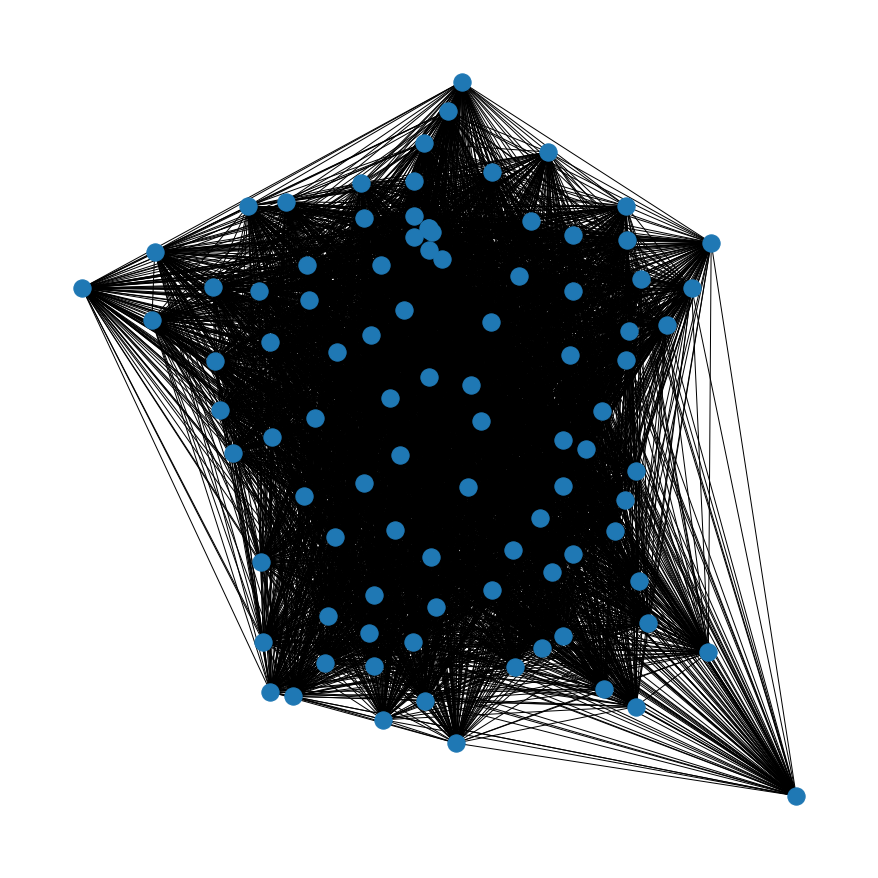

>__Question 7:__ Que peut-on prendre comme configuration initiale de circuit ? 

>__Question 8:__ 
Répondre aux questions __2__ et __6__ en remplaçant les données `villes_bzh.dat` (respectivement `routes_bzh.dat`) par `villes.dat` (resp. `routes.dat`).

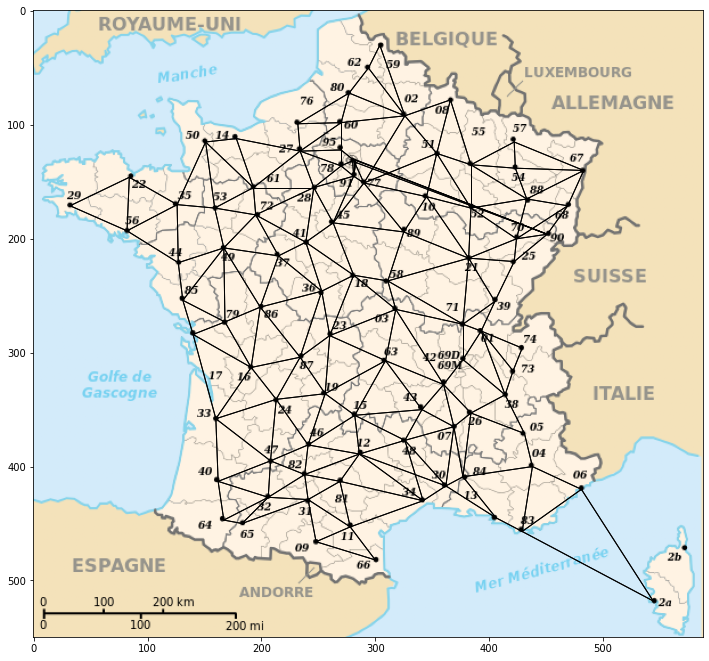

In [40]:
def afficher_carte(c=np.arange(95)+1):
    carte = mpimg.imread('france.png')

    plt.show()
    
afficher_carte()

78001038.69452457


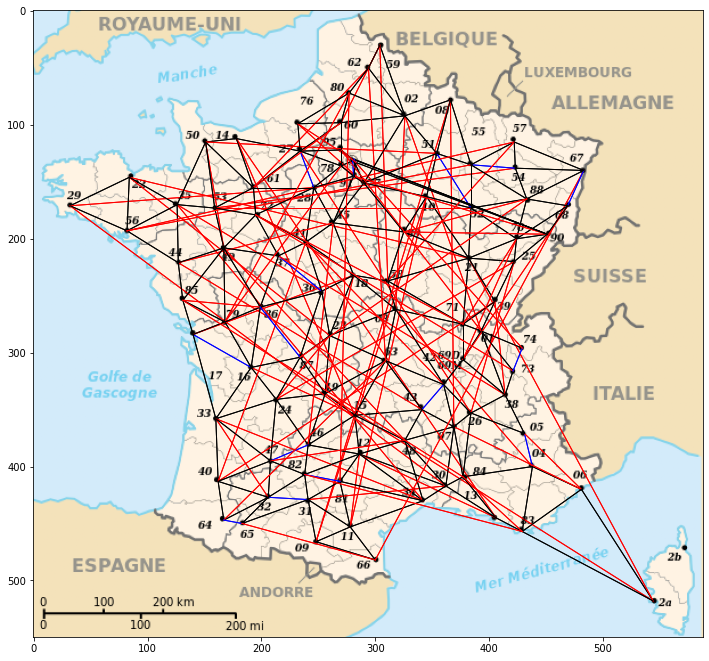

Afin de faciliter notre approche, on va partir du graphe complet où l'on aura fortement pénalisé les arêtes qui ne proviennent pas du graphe initial.



[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95  1]
[ 3  4  2  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95  1]



### Exposés possibles :



($\star$) https://en.wikipedia.org/wiki/2-opt
($\star--\star\star$) Autre problèmes NP-complets (colorations de graphes, sac à dos, dominating set ...)